In [1]:
import pandas as pd
import numpy as np

In [2]:
node_s02_df = pd.read_csv('/run/media/vincenzo/TOSHIBA EXT/CovellaScript/data1/computeNodesCSV/mpp3r02c05s02.csv', header=0, index_col=0, parse_dates=True)

In [3]:
node_s02 = node_s02_df.loc[:, ~node_s02_df.columns.str.contains('cpu[0-9]')]

In [4]:
node_s02_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 166664 entries, 2020-03-06 11:15:31 to 2020-03-08 09:33:14
Columns: 874 entries, Active-anon to cpu63/branch-misses
dtypes: float64(874)
memory usage: 1.1 GB


In [5]:
node_s02.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 166664 entries, 2020-03-06 11:15:31 to 2020-03-08 09:33:14
Columns: 106 entries, Active-anon to pswpin
dtypes: float64(106)
memory usage: 136.1 MB


In [6]:
for col in node_s02.columns:
    if 'label' in col.lower():
        print(col)

experiment/applicationLabel
faultLabel


In [7]:
node_s02['faultPred']

Time
2020-03-06 11:15:31    0.0
2020-03-06 11:15:32    0.0
2020-03-06 11:15:33    0.0
2020-03-06 11:15:34    0.0
2020-03-06 11:15:35    0.0
                      ... 
2020-03-08 09:33:10    0.0
2020-03-08 09:33:11    0.0
2020-03-08 09:33:12    0.0
2020-03-08 09:33:13    0.0
2020-03-08 09:33:14    0.0
Name: faultPred, Length: 166664, dtype: float64

In [8]:
np.unique(node_s02['experiment/applicationLabel'])

array([ 0., 10., 20., 21., 22., 23., 24.])

In [9]:
np.unique(node_s02['faultLabel'])

array([0., 1., 2., 3., 4., 5., 6., 7.])

In [10]:
np.unique(node_s02['faultPred'])

array([0., 2., 6., 7.])

In [17]:
node_s02['experiment/applicationLabel'].value_counts(sort=False)

0.0     39401
10.0        1
20.0    32310
21.0     5636
22.0    41211
23.0    38981
24.0     9124
Name: experiment/applicationLabel, dtype: int64

In [23]:
node_s02['faultLabel'].value_counts(sort=False).sort_index()

0.0    138657
1.0      6640
2.0      3277
3.0      4375
4.0      4108
5.0      1637
6.0      3988
7.0      3982
Name: faultLabel, dtype: int64

In [19]:
node_s02['faultPred'].value_counts(sort=False)

0.0    164537
2.0       476
6.0       791
7.0       860
Name: faultPred, dtype: int64

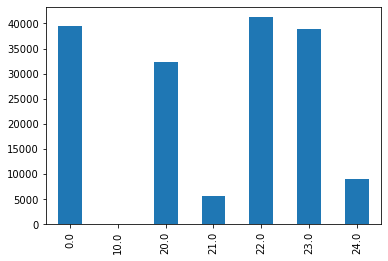

In [20]:
node_s02['experiment/applicationLabel'].value_counts(sort=False).plot(kind='bar')

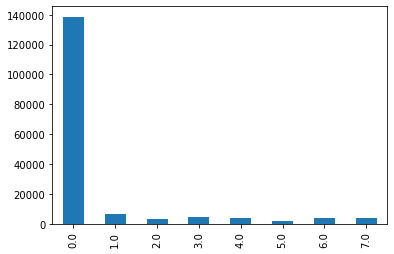

In [24]:
node_s02['faultLabel'].value_counts(sort=False).sort_index().plot(kind='bar')

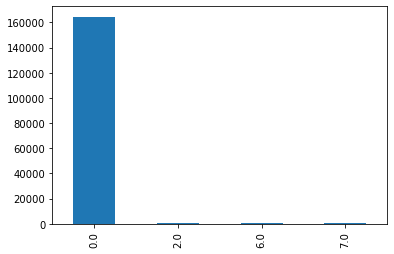

In [22]:
node_s02['faultPred'].value_counts(sort=False).plot(kind='bar')

In [41]:
def countAnalysis(name, df):
    import matplotlib.pyplot as plt
    
    print(name, " applicationLabel count")
    print(df['experiment/applicationLabel'].value_counts(sort=False).sort_index())
    print()
    
    print(name, " faultLabel count")
    print(df['faultLabel'].value_counts(sort=False).sort_index())
    print()
    
    print(name, " faultPred count and")
    print(df['faultPred'].value_counts(sort=False).sort_index())
    print()
    
    df['experiment/applicationLabel'].value_counts(sort=False).sort_index().plot(kind='bar').set_title(name + " applicationLabel")
    plt.show()
    df['faultLabel'].value_counts(sort=False).sort_index().plot(kind='bar').set_title(name + " faultLabel")
    plt.show()
    df['faultPred'].value_counts(sort=False).sort_index().plot(kind='bar').set_title(name + " faultPred")
    plt.show()

In [27]:
def removeCPUMetrics(df):
    df = df.loc[:, ~df.columns.str.contains('cpu[0-9]')]
    return df

In [28]:
node2 = 'mpp3r02c05s03'
node3 = 'mpp3r02c05s05'
node4 = 'mpp3r02c05s07'

node2_df = pd.read_csv('/run/media/vincenzo/TOSHIBA EXT/CovellaScript/data1/computeNodesCSV/' + node2 + ".csv", header=0, index_col=0, parse_dates=True)
node2_df = removeCPUMetrics(node2_df)
node3_df = pd.read_csv('/run/media/vincenzo/TOSHIBA EXT/CovellaScript/data1/computeNodesCSV/' + node3 + ".csv", header=0, index_col=0, parse_dates=True)
node3_df = removeCPUMetrics(node3_df)
node4_df = pd.read_csv('/run/media/vincenzo/TOSHIBA EXT/CovellaScript/data1/computeNodesCSV/' + node4 + ".csv", header=0, index_col=0, parse_dates=True)
node4_df = removeCPUMetrics(node4_df)

mpp3r02c05s03  applicationLabel count
0.0     39404
20.0    32310
21.0     5636
22.0    41211
23.0    38981
24.0     9122
Name: experiment/applicationLabel, dtype: int64

mpp3r02c05s03  faultLabel count
0.0    134436
1.0      3779
2.0      7274
3.0      4082
4.0      5166
5.0      4168
6.0      4996
7.0      2763
Name: faultLabel, dtype: int64

mpp3r02c05s03  faultPred count and
0.0     56672
2.0      2219
3.0         9
4.0       228
5.0       524
6.0    106730
7.0       282
Name: faultPred, dtype: int64



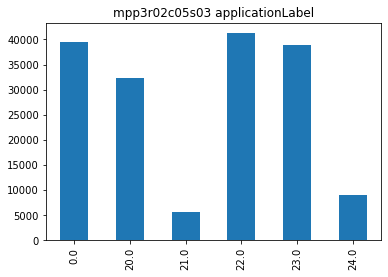

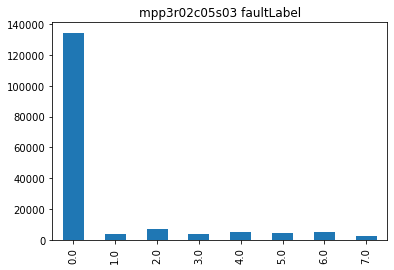

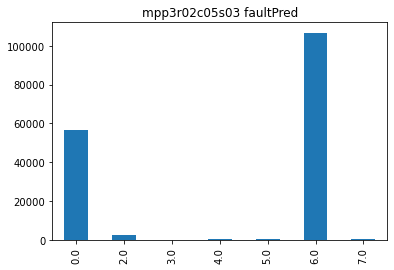

mpp3r02c05s05  applicationLabel count
0.0     39403
20.0    32310
21.0     5636
22.0    41211
23.0    38981
24.0     9123
Name: experiment/applicationLabel, dtype: int64

mpp3r02c05s05  faultLabel count
0.0    136972
1.0      4868
2.0      5242
3.0      1547
4.0      3500
5.0      6252
6.0      3607
7.0      4676
Name: faultLabel, dtype: int64

mpp3r02c05s05  faultPred count and
0.0    164444
2.0       365
5.0       168
6.0       314
7.0      1373
Name: faultPred, dtype: int64



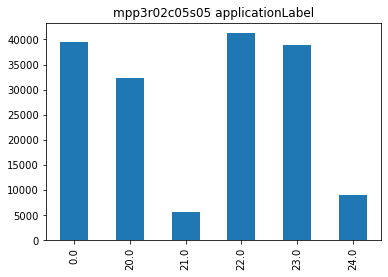

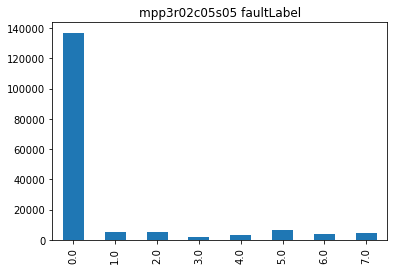

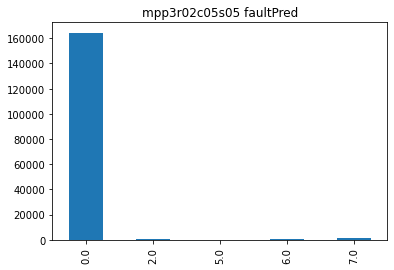

mpp3r02c05s07  applicationLabel count
0.0     39402
20.0    32310
21.0     5636
22.0    41211
23.0    38981
24.0     9123
Name: experiment/applicationLabel, dtype: int64

mpp3r02c05s07  faultLabel count
0.0    135983
1.0      3715
2.0      3136
3.0      4263
4.0      5111
5.0      5529
6.0      4638
7.0      4288
Name: faultLabel, dtype: int64

mpp3r02c05s07  faultPred count and
0.0    164074
2.0       392
4.0        55
5.0       359
6.0      1434
7.0       349
Name: faultPred, dtype: int64



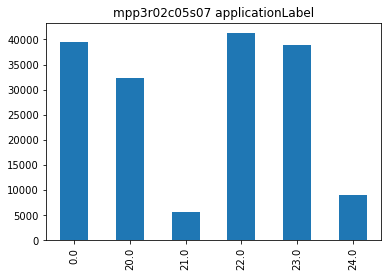

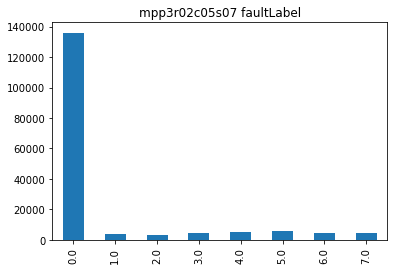

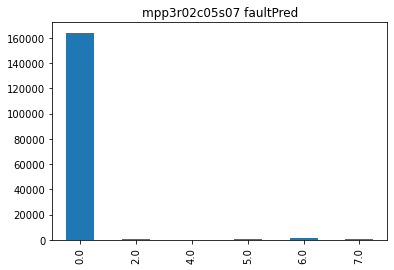

In [42]:
namelist = [node2, node3, node4]
nodelist = [node2_df, node3_df, node4_df]

for name, node in zip(namelist, nodelist):
    countAnalysis(name, node)